# Decision Trees Attempt 1 Numerical values

In [6]:

from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [7]:
df_test = pd.read_csv('../playground-series-s4e2/test.csv')#test data
df_train= pd.read_csv('../playground-series-s4e2/train.csv')#train data 

In [8]:
feature_cols = ['Weight','FCVC','NCP','CH2O', 'FAF', 'TUE',]
X = df_train[feature_cols]
X.head()
#print(X.shape)#size of feature X 

,Weight,FCVC,NCP,CH2O,FAF,TUE
0,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721


In [9]:
y = df_train['NObeyesdad']
y[::10]

0        Overweight_Level_II
10        Overweight_Level_I
20       Overweight_Level_II
30           Obesity_Type_II
40             Normal_Weight
                ...         
20710        Obesity_Type_II
20720         Obesity_Type_I
20730     Overweight_Level_I
20740          Normal_Weight
20750     Overweight_Level_I
Name: NObeyesdad, Length: 2076, dtype: object

In [10]:
my_decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=None,)#decision tree 



In [11]:
my_decisiontree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [13]:
print(X_train.shape)
print(y_train.shape)

(14530, 6)
(14530,)


In [14]:
print(X_test.shape)
print(y_test.shape)

(6228, 6)
(6228,)


In [15]:
my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
y_predict_dt = my_decisiontree.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

0.7882145150931278


In [18]:
from sklearn import tree
text_representation = tree.export_text(my_decisiontree, feature_names = feature_cols)
print(text_representation)

|--- Weight <= 98.22
|   |--- Weight <= 75.39
|   |   |--- Weight <= 60.63
|   |   |   |--- Weight <= 52.81
|   |   |   |   |--- Weight <= 44.97
|   |   |   |   |   |--- FCVC <= 2.58
|   |   |   |   |   |   |--- Weight <= 41.98
|   |   |   |   |   |   |   |--- class: Insufficient_Weight
|   |   |   |   |   |   |--- Weight >  41.98
|   |   |   |   |   |   |   |--- TUE <= 0.93
|   |   |   |   |   |   |   |   |--- FCVC <= 2.00
|   |   |   |   |   |   |   |   |   |--- Weight <= 42.20
|   |   |   |   |   |   |   |   |   |   |--- FAF <= 0.89
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- FAF >  0.89
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- Weight >  42.20
|   |   |   |   |   |   |   |   |   |   |--- Weight <= 42.97
|   |   |   |   |   |   |   |   |   |   |   |--- class: Normal_Weight
|   |   |   |   |   |   |   |   |   |   |--- Weight >  42.9

# ATTEMPT 2 Non-Numerical Values


In [19]:
import pandas as pd
feature_cols = ['Gender','family_history_with_overweight','FAVC','CAEC', 'SMOKE', 'SCC','CALC','MTRANS']
X = df_train[feature_cols]
X_encoded = pd.get_dummies(X, columns= feature_cols)
#X_encoded.head()


In [20]:
y = df_train['NObeyesdad']


In [21]:
my_decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=None,)#decision tree 
my_decisiontree.fit(X_encoded,y)


DecisionTreeClassifier(criterion='entropy')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded ,y, test_size = 0.3, random_state = 2)
my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
y_predict_dt = my_decisiontree.predict(X_test)
score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

0.581727681438664


In [24]:
feature_cols = X_encoded.columns.tolist()

text_representation = tree.export_text(my_decisiontree, feature_names = feature_cols)
print(text_representation)

|--- Gender_Female <= 0.50
|   |--- family_history_with_overweight_yes <= 0.50
|   |   |--- CAEC_no <= 0.50
|   |   |   |--- MTRANS_Automobile <= 0.50
|   |   |   |   |--- CALC_no <= 0.50
|   |   |   |   |   |--- FAVC_yes <= 0.50
|   |   |   |   |   |   |--- MTRANS_Public_Transportation <= 0.50
|   |   |   |   |   |   |   |--- MTRANS_Bike <= 0.50
|   |   |   |   |   |   |   |   |--- CALC_Sometimes <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: Overweight_Level_I
|   |   |   |   |   |   |   |   |--- CALC_Sometimes >  0.50
|   |   |   |   |   |   |   |   |   |--- CAEC_Sometimes <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- CAEC_Frequently <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Normal_Weight
|   |   |   |   |   |   |   |   |   |   |--- CAEC_Frequently >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Normal_Weight
|   |   |   |   |   |   |   |   |   |--- CAEC_Sometimes >  0.50
|   |   |   |   |   |   |   |   |   |   |--- SCC_yes <= 0.

# Attempt 3 ALL FEATURES

In [25]:
feature_cols1 = ['Weight','FCVC','NCP','CH2O', 'FAF', 'TUE']
feature_cols2 = ['Gender','family_history_with_overweight','FAVC','CAEC', 'SMOKE', 'SCC','CALC','MTRANS']
X1 = df_train[feature_cols1]

X2_encoded = pd.get_dummies(df_train[feature_cols2], columns=feature_cols2)

X = pd.concat([X1,X2_encoded], axis =1)
my_decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=None,)#decision tree 
my_decisiontree.fit(X,y)




DecisionTreeClassifier(criterion='entropy')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded ,y, test_size = 0.3, random_state = 2)
my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
y_predict_dt = my_decisiontree.predict(X_test)
score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

0.581888246628131


In [28]:
feature_cols = X_test.columns.tolist()

text_representation = tree.export_text(my_decisiontree, feature_names = feature_cols)
print(text_representation)

|--- Gender_Female <= 0.50
|   |--- family_history_with_overweight_yes <= 0.50
|   |   |--- CAEC_no <= 0.50
|   |   |   |--- MTRANS_Automobile <= 0.50
|   |   |   |   |--- CALC_no <= 0.50
|   |   |   |   |   |--- FAVC_yes <= 0.50
|   |   |   |   |   |   |--- MTRANS_Public_Transportation <= 0.50
|   |   |   |   |   |   |   |--- MTRANS_Walking <= 0.50
|   |   |   |   |   |   |   |   |--- CAEC_Frequently <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: Overweight_Level_I
|   |   |   |   |   |   |   |   |--- CAEC_Frequently >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Normal_Weight
|   |   |   |   |   |   |   |--- MTRANS_Walking >  0.50
|   |   |   |   |   |   |   |   |--- CALC_Frequently <= 0.50
|   |   |   |   |   |   |   |   |   |--- CAEC_Sometimes <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- CAEC_Frequently <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Normal_Weight
|   |   |   |   |   |   |   |   |   |   |--- CAEC_Frequently >  0.50
|   |   

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       755
           1       0.80      0.80      0.80       907
           2       0.79      0.80      0.80       858
           3       0.95      0.95      0.95      1005
           4       0.99      0.99      0.99      1207
           5       0.66      0.68      0.67       733
           6       0.70      0.69      0.70       763

    accuracy                           0.84      6228
   macro avg       0.83      0.83      0.83      6228
weighted avg       0.84      0.84      0.84      6228



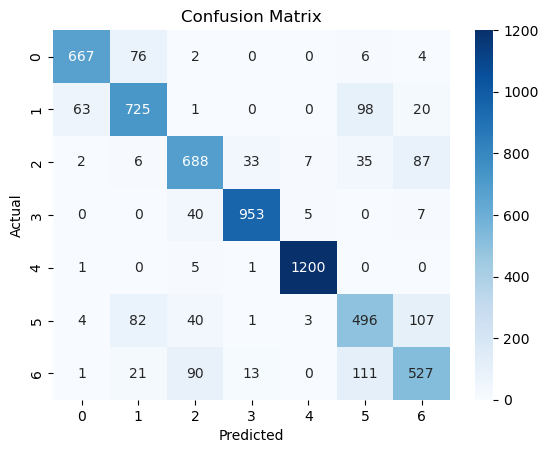

Feature Importance:
                           Feature  Importance
3                           Weight    0.467711
0                           Gender    0.193839
2                           Height    0.145122
1                              Age    0.038470
10                            CH2O    0.033952
6                             FCVC    0.018896
12                             FAF    0.018323
7                              NCP    0.017654
13                             TUE    0.016053
14                            CALC    0.013909
5                             FAVC    0.011779
8                             CAEC    0.008653
4   family_history_with_overweight    0.007249
15                          MTRANS    0.005496
11                             SCC    0.002580
9                            SMOKE    0.000315

Top Features:
  Feature  Importance
3  Weight    0.467711
0  Gender    0.193839
2  Height    0.145122

Worst Features:
   Feature  Importance
15  MTRANS    0.005496
11     SCC    0

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming `train_df` is your DataFrame)
train_df = pd.read_csv('../playground-series-s4e2/train.csv')  # Example loading a CSV dataset

# Encode binary categorical columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
label_encoder = LabelEncoder()
for col in binary_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# Encode the target variable (assuming 'NObeyesdad' is the target column)
label_encoder_target = LabelEncoder()
train_df['NObeyesdad'] = label_encoder_target.fit_transform(train_df['NObeyesdad'])

# Define features (X) and target (y)
X = train_df.drop(['id', 'NObeyesdad'], axis=1)  # Drop 'id' and target 'NObeyesdad'
y = train_df['NObeyesdad']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features (optional, depending on your model's requirement)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = dt_model.predict(X_val_scaled)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (Optional)
feature_importances = dt_model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_df)

# Show top 3 and worst 3 features
top_features = feature_df.head(3)
worst_features = feature_df.tail(3)

print("\nTop Features:")
print(top_features)

print("\nWorst Features:")
print(worst_features)